In [1]:
import pandas as pd

In [2]:
#p1
df = pd.read_csv("ASTR19_S22_group_project_data.txt",sep='\s+',skiprows=3,header=None)
df.head()

,0,1,2
0,1,8:07,6.57
1,1,15:37,-0.39
2,2,8:55,5.38
3,2,16:25,-1.74
4,3,9:45,5.26


In [3]:
df.columns = ['date_index','time','tide']
df.head()

,date_index,time,tide
0,1,8:07,6.57
1,1,15:37,-0.39
2,2,8:55,5.38
3,2,16:25,-1.74
4,3,9:45,5.26


In [4]:
# moring_df=df.drop_duplicates(subset=['date_index'],keep='first')
# moring_df = moring_df.reset_index()
# moring_df.head()

In [5]:
#moring_df.shape

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
x = df.index

In [8]:
n = len(x)
n

82

In [9]:
y = df['tide']
yerr = np.full(n,0.25)
yerr

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25])

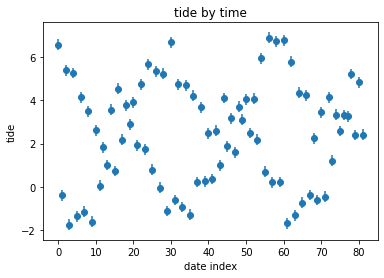

In [10]:
plt.errorbar(x, y, yerr,fmt='o')
#plt.plot(x,y)
plt.xlabel("date index")
plt.ylabel("tide")
plt.title("tide by time")
plt.show()

C:\Users\13720\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


params:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.24841619e-03
 -2.60663940e-04  7.52475047e-06 -7.78406710e-08 -2.81562799e-10
  1.06373069e-11 -5.34617826e-14  1.31492986e-19 -4.54062031e-20
  3.35855143e-20 -5.64998353e-20  9.30307463e-21]
params size: 15


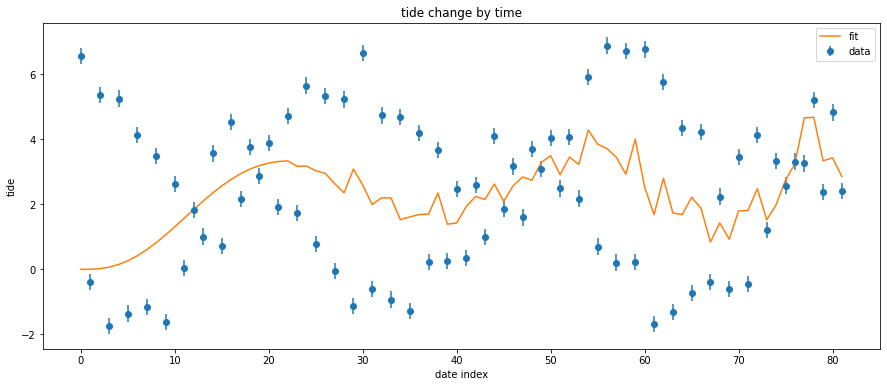

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def polynomFit(x, *args):
    a =args[0]
    b =args[1]
    c =args[2]
    res = a*np.sin(b*x+c)
    for order in range(3,len(args)):
        res+=args[order] * x**order
    return res
order = 14
plt.figure(figsize=(15,6))
plt.errorbar(x, y, yerr,fmt='o',label='data')
params, pcov = curve_fit(polynomFit, xdata=x, ydata=y,sigma=yerr ,p0=[0]*(order+1) )
fitData=polynomFit(x,*params)
plt.plot(x,fitData,label='fit')
plt.legend()
plt.xlabel("date index")
plt.ylabel("tide")
plt.title("tide change by time")
plt.savefig("tide change.pdf")
print("params: ",params)
print("params size:",len(params))

In [12]:
residuals = fitData - y

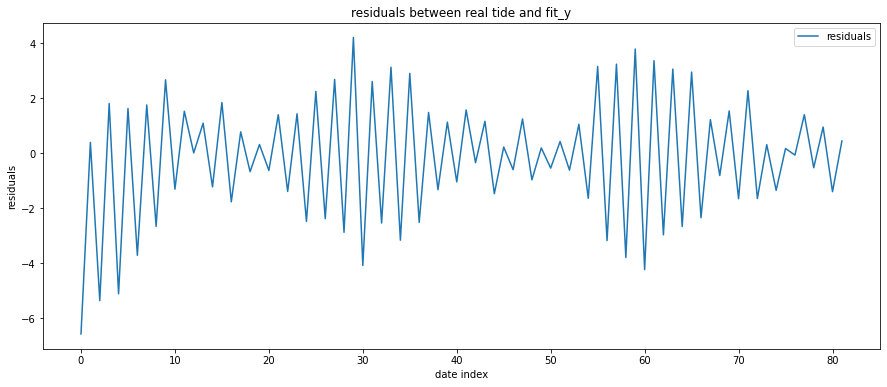

In [13]:
plt.figure(figsize=(15,6))
plt.plot(x,residuals,label='residuals')
plt.legend()
plt.xlabel("date index")
plt.ylabel("residuals")
plt.title("residuals between real tide and fit_y")
plt.savefig("residuals plot.pdf")


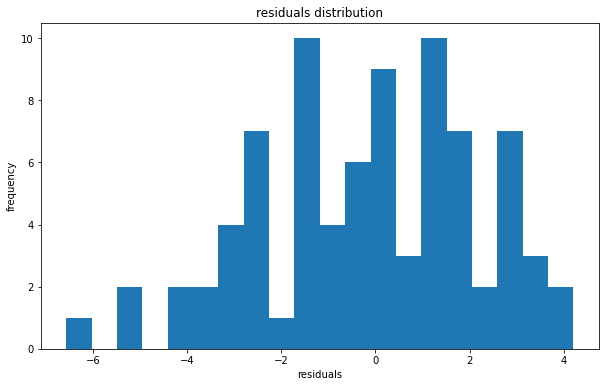

In [14]:
plt.figure(figsize=(10,6))
plt.hist(residuals,bins=20)
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.title("residuals distribution")
plt.savefig("residuals distribution.pdf")
plt.show()

In [15]:
std = residuals.std()
print("the std of residuals is ",std)
mean = residuals.mean()
print("the mean of residuals is ",mean)
median = residuals.median()
print("the median of residuals is ",median)

the std of residuals is  2.324988823051536
the mean of residuals is  -0.18058091288513917
the median of residuals is  0.09237764205397825


In [16]:
std = np.array(fitData).std()
std

1.0759411298881365

In [17]:
y_np = np.array(y)
y_np = np.append(y_np,[2],axis=0)
y_np

array([ 6.57, -0.39,  5.38, -1.74,  5.26, -1.36,  4.13, -1.15,  3.48,
       -1.61,  2.62,  0.05,  1.83,  1.01,  3.57,  0.73,  4.54,  2.17,
        3.76,  2.88,  3.9 ,  1.92,  4.73,  1.74,  5.66,  0.79,  5.33,
       -0.04,  5.23, -1.12,  6.67, -0.61,  4.74, -0.93,  4.69, -1.29,
        4.2 ,  0.22,  3.68,  0.26,  2.47,  0.36,  2.59,  0.99,  4.1 ,
        1.87,  3.17,  1.6 ,  3.71,  3.1 ,  4.04,  2.49,  4.07,  2.18,
        5.93,  0.7 ,  6.89,  0.21,  6.72,  0.22,  6.77, -1.68,  5.77,
       -1.32,  4.35, -0.73,  4.23, -0.38,  2.24, -0.61,  3.45, -0.46,
        4.13,  1.21,  3.34,  2.58,  3.32,  3.26,  5.21,  2.39,  4.83,
        2.41,  2.  ])

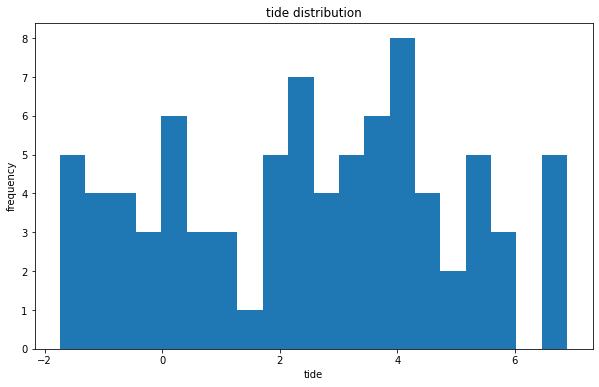

In [18]:
plt.figure(figsize=(10,6))
plt.hist(y_np,bins=20)
plt.xlabel("tide")
plt.ylabel("frequency")
plt.title("tide distribution")
plt.savefig("tide distribution.pdf")
plt.show()